# Homework 2 - Course Completion Analysis & Prediction Using ML
### Sakka Mohamad-Mario `1241EB`

Importing All Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Exploratory Data Analysis (EDA)

### 1.A. Describe the structure of the data: number of rows, columns, and data types.

Importing all necessary libraries

In [7]:

records = pd.read_csv("data.csv")

print("Table dimensions (n_rows, n_columns):", records.shape)

print("\nOverview of columns and types:")
records.info()

num_features = records.select_dtypes(include=["int64", "float64"]).columns
cat_features = records.select_dtypes(include=["object"]).columns

print("\nNumeric features:")
print(list(num_features))

print("\nCategorical features:")
print(list(cat_features))


Table dimensions (n_rows, n_columns): (100000, 43)

Overview of columns and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          100000 non-null  object 
 1   Project_Grade                 100000 non-null  float64
 2   Enrollment_Date               100000 non-null  object 
 3   Procrastination_Index         100000 non-null  float64
 4   Completed                     75000 non-null   object 
 5   Notifications_Checked         100000 non-null  int64  
 6   Average_Session_Duration_Min  100000 non-null  float64
 7   Discussion_Participation      100000 non-null  int64  
 8   Age                           100000 non-null  int64  
 9   Payment_Amount                100000 non-null  int64  
 10  Peer_Interaction_Score        90685 non-null   float64
 11  App_Usage_Percentage  

As we can see in the output above, we've got *10K* rows, with *43* columns

For some features there's a lot of missing values. Most importantly, the `Completed` column is missing *25K* values, then we also have `Peer_Interaction_Percentage`, `Device_Type`, `Days_Since_Last_Login`, `Internet_Connection_Quality`, `City`.

### 1.B. Identify correlations between data

Here, we first choose the rows where `Completed` has values, then we generate the correlation heatmap to identify features which are strongly correlated to the completion of courses.

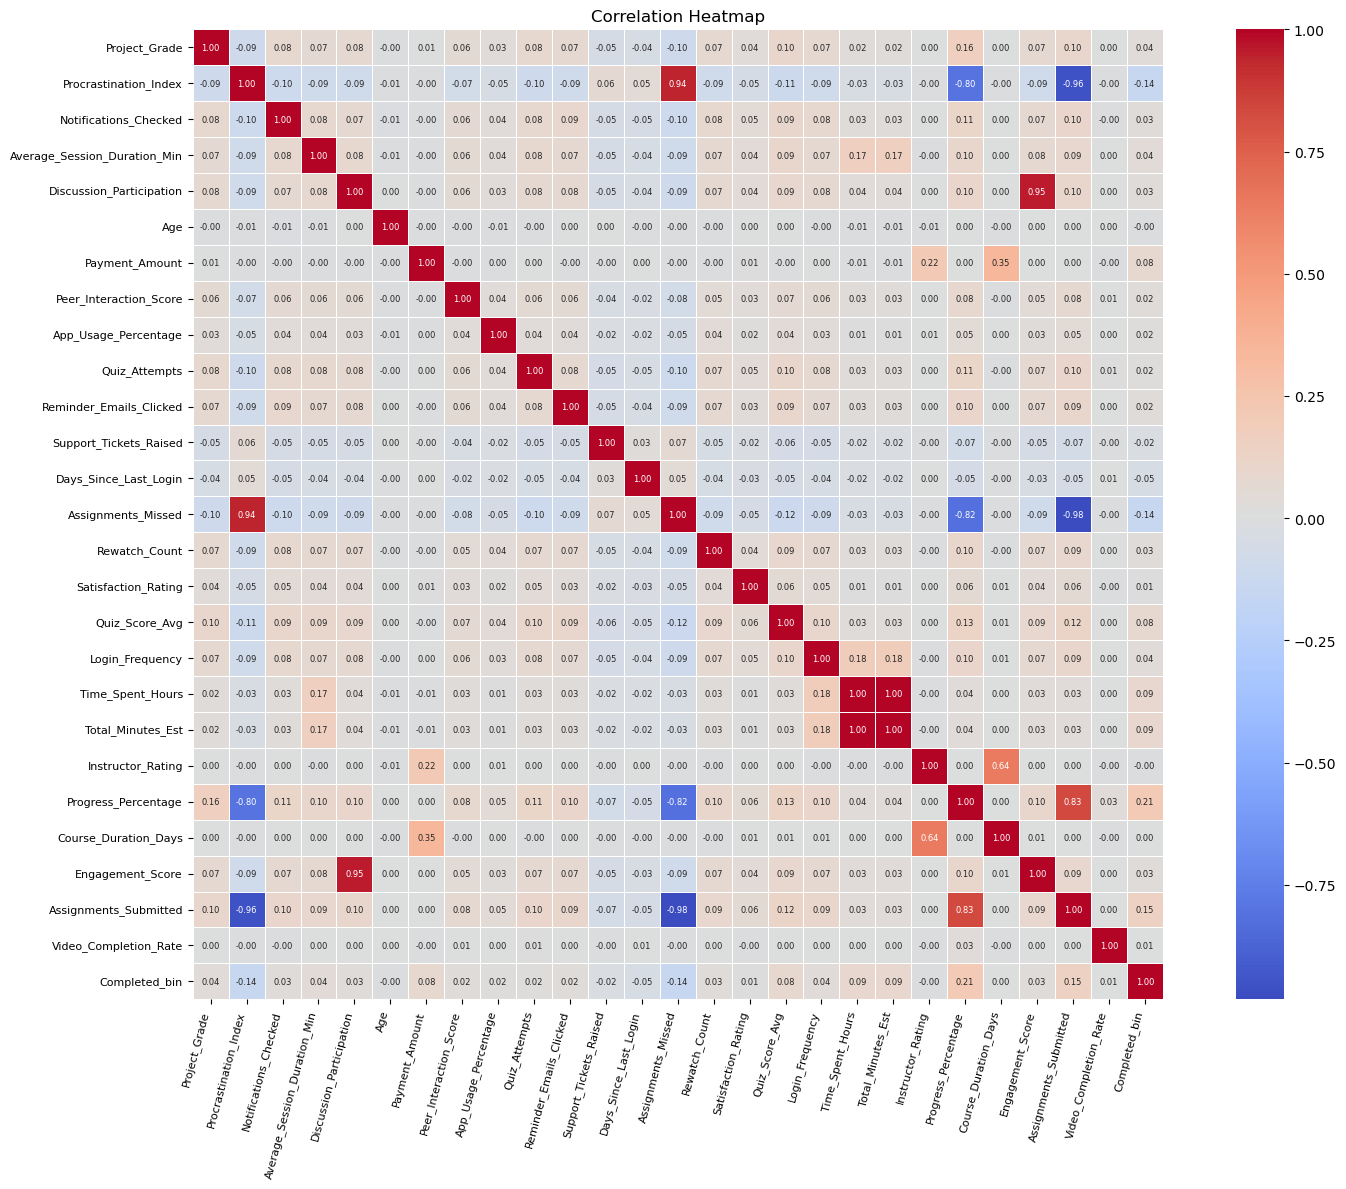

In [8]:
corr_records = records.dropna(subset=["Completed"]).copy()

corr_records["Completed_bin"] = (corr_records["Completed"] == "Completed").astype(int)

num_features_corr_records = corr_records.select_dtypes(include=["int64", "float64"]).columns

corr_mat = corr_records[num_features_corr_records].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_mat,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    annot_kws={"size": 6}
)

plt.title("Correlation Heatmap")
plt.xticks(rotation=75, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


This is a huge number of features, most of them having very little correlation with others. We also notice some strong, sensible correlations between multiple features. These are the biggest ones:

**The positive ones:**
- `Assignments_Missed <--> Procrastination_Index:` 0.94 - Students who miss more assignments tend to have a higher procrastination index.
- `Engagement_Score <--> Discussion_Participation:` 0.95 - Students with higher engagement scores tend to participate more in discussions.
- `Total_Minutes_Est <--> Time_Spent_Hours:` 1.00 - When the total estimated minutes for a course is higher, the time students spend on the platform also increases in a very consistent, almost one-to-one way. This tells us that one of these columns can be written as a simple transformation of the other, so they carry almost the same information. To avoid redundant features and keep the model simpler, we keep only one of them and drop the other from the dataset.
- `Assignments_Submitted <--> Progress_Percentage:` 0.83 - Students who submit more assignments tend to have a higher course progress percentages.
- `Course_Duration_Days <--> Instructor_Rating:` 0.64 - Longer courses are often associated with instructors who have higher ratings. 
- `Course_Duration_Days <--> Payment_Amount:` 0.35 - There is a weak tendency for more expensive courses to also last longer.

**The negative ones:**
- `Assignments_Submitted <--> Procrastination_Index:` -0.96 - Students with higher procrastination indices tend to submit less assignments.
- `Assignments_Submitted <--> Assignments_Missed:` -0.98 - Students who submit more assignments tend to miss less of them (obviously).
- `Progress_Percentage <--> Procrastination_Index:` -0.80 - Students with higher procrastination indices tend to have lower course progress percentages.
- `Progress_Percentage <--> Assignments_Missed:` -0.82 - Students who submit less assignments tend to have lower course progress percentages.

As we can see, none of the features seem to have strong correlations with the `Completed` feature.

After removing features that are either redundant or not very meaningful for this problem, we keep a subset of variables that look most relevant. Their correlations are shown in the map below:

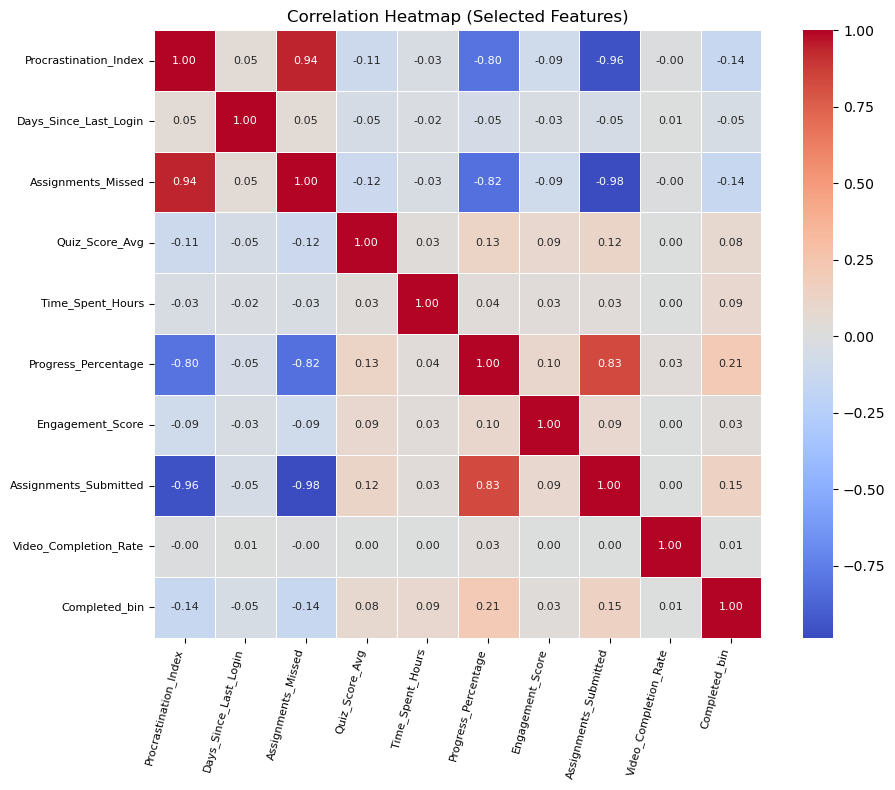

In [10]:
selected_features = [
    "Procrastination_Index",
    "Days_Since_Last_Login",
    "Assignments_Missed",
    "Quiz_Score_Avg",
    "Time_Spent_Hours",
    "Progress_Percentage",
    "Engagement_Score",
    "Assignments_Submitted",
    "Video_Completion_Rate",
    "Completed_bin",
]

selected_corr_records = corr_records[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    selected_corr_records,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap (Selected Features)")
plt.xticks(rotation=75, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

From the heatmap, we can see that the features most related to completion are:

- Positively: `Progress_Percentage`, `Assignments_Submitted`
- Negatively: `Assignments_Missed`, `Procrastination_Index`

These correlations are not very strong in absolute value, but compared to the rest of the features they stand out as the ones most closely associated with whether a student completes the course or not.

### 1.C. Make plots to show data distributions

### 1.D. Identify target and feature variables

### 1.E. Highlight potential issues in the Data

## 2. Data Processing

### 2.A. Identify outliers

### 2.B. Deal with missing values

### 2.C. Deal with categorical data

### 2.D. Standardize or normalize numerical features as needed

### 2.E. Use principal component analysis (PCA)

## 3. Deal With Data Imbalance (2 Methods)

### 3.A. First method: **SMOTE**

### 3.B. Second method: **Undersampling**

## 4. Test 5 Different ML Methods and Print Performance Metrics

## 5. Conclusion: Summary of Findings, Best-Performing Model, and Future Improvements